# U1B model: Neutrino masses + DM scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

In [3]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

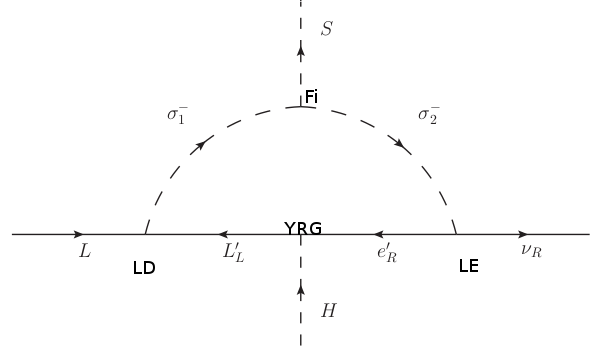

In [4]:
from IPython.display import Image
Image("zee-couplings.png")

Read the scanning

In [5]:
#Read old file
xd = pd.read_csv('general-scan.csv')
del xd['Unnamed: 0']

xd.shape

(385851, 105)

## Dark matter $\Omega h^2$
Planck results 2018

In [6]:
#Experimental values for DM:Planck results 2018
e = 15
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.102 0.12 0.13799999999999998


In [7]:
xd = xd[np.logical_and(xd.Omega >= Omega_min, xd.Omega <= Omega_max)]

In [8]:
xd.shape

(1351, 105)

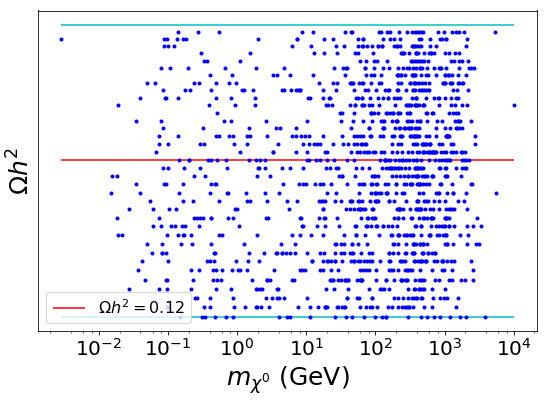

In [9]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi,xd.Omega,'b.',label=r'')

plt.hlines(Omega_max,xd.mchi.min(),xd.mchi.max(), 'c',label=r'')
plt.hlines(Omega_min,xd.mchi.min(),xd.mchi.max(), 'c',label=r'')

plt.hlines(Omega,xd.mchi.min(),xd.mchi.max(), 'r',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
#plt.savefig('plots/DM_mchi.pdf')
plt.show()

## Neutrino masses
Status of neutrino oscillations 2018: first hint for normal mass ordering and improved CP sensitivity. https://arxiv.org/abs/1708.01186

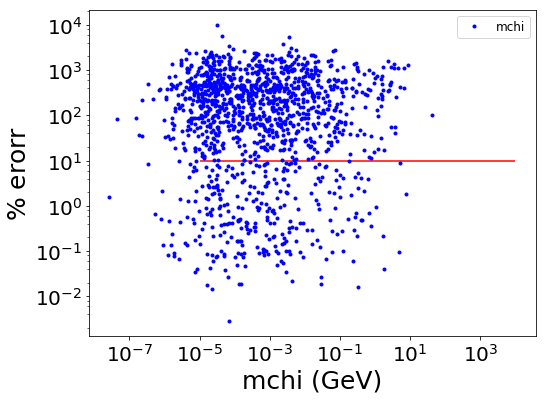

In [10]:
plt.figure(figsize=(8,6))

plt.hlines(10, 1e-5,1e4,'r')

plt.loglog(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2,xd.mchi,'b.')

plt.xlabel(r'mchi (GeV)',size=25)
plt.ylabel(r'$\%$ erorr',size=25)
plt.legend(prop={'size':12},loc='best')

plt.show()

Improbing the reconstruction of the neutrino masses to the $10\%$

In [9]:
xd = xd[np.logical_and(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2<10., np.abs(xd.mnu3-xd.mv3)*100/xd.mv3<10.)]

xd = xd.reset_index()
del[xd['index']]

In [10]:
xd.shape

(1350, 105)

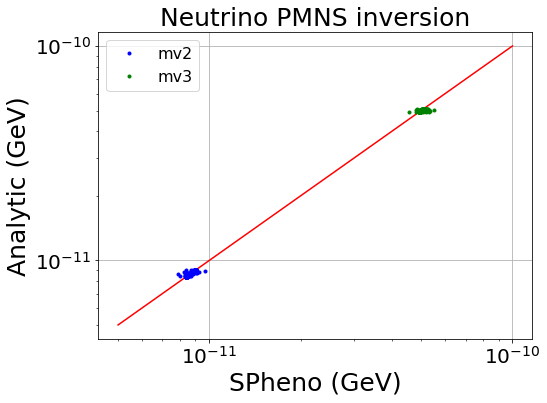

In [11]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

plt.loglog(xd.mnu2,xd.mv2,'b.')
plt.loglog(xd.mnu3,xd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPheno (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')
plt.show()

In [11]:
xxd=xd[np.sqrt(0.1312*np.abs(xd.Lambda4)) < np.abs(xd.Lambda5)/2.]

In [12]:
xxd.shape

(366, 105)

Export good points to run the etaB rutine for Nariogenesis and recover the good points etaB.csv

In [13]:
#xd.to_csv('good-points.csv')
etaBbig = pd.read_csv('etaB_big.csv')
etaB = pd.read_csv('etaB.csv')
#file after depuring the Walter rutine
etaB10 = pd.read_csv('etaB_10.csv')

etaB.shape

print(etaB.shape,etaB10.shape)

(8187, 12) (82, 109)


In [15]:
xxd=etaB10[np.sqrt(0.1312*np.abs(etaB10.Lambda4)) < np.abs(etaB10.Lambda5)/2.]

In [16]:
xxd.shape

(20, 109)

### Z' mass

\begin{equation}
M_{Z^{'}} =Q_{\Phi}g^{'} v_\Phi =  5 g^{'} v_\Phi
\end{equation}

In [17]:
from scipy import interpolate

#1908.04818 arxiv
names1 = ['MZp', 'g1p']
#a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_U1B/LHC.dat')
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_U1B/fig2_181006646.dat')
LHC = pd.DataFrame(a, columns=names1)

names2 = ['MZp', 'g1p']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_U1B/Upsilon.dat')
Upsilon = pd.DataFrame(a, columns=names2)

names3 = ['MZp', 'g1p']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_U1B/J_Psi.dat')
JPsi = pd.DataFrame(a, columns=names2)

In [18]:
def LEP_recta(x):
    
    y = 0.015 + (x-1.)*(1.-0.015)/(70.-1.)
    return y

In [19]:
#error
ttt=xd[np.logical_and(xd.MZp>10.,xd.g1p < 3e-5)]
#rm index 19

xd=xd[xd.index != 19]

xd = xd.reset_index()
del[xd['index']]
######################

#rm index 3
etaB=etaB[etaB.index != 3]

etaB = etaB.reset_index()
del[etaB['index']]

del[etaB['Unnamed: 0']]

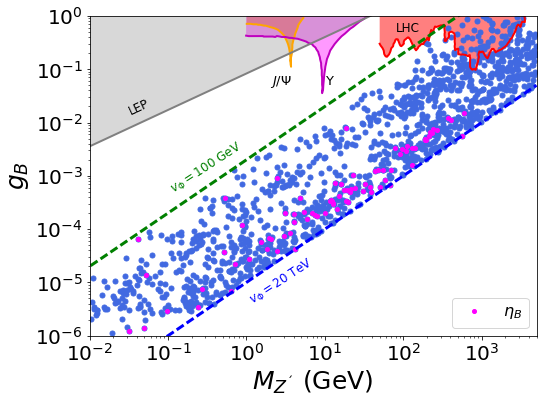

In [20]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MZp,xd.g1p,color='royalblue', marker='o',ms=5,linestyle='',label='')

plt.loglog(etaB10.MZp, etaB10.g1p,color='magenta', marker='o',ms=4,linestyle='',label=r'$\eta_B$')

a = np.linspace(1e-3,5e3,20)
#Upsilon, LHC, .. limits
plt.plot(JPsi.MZp, JPsi.g1p,color='orange',lw=2,label=r'')
plt.plot(Upsilon.MZp, Upsilon.g1p,'m-',lw=2,label=r'')
plt.plot(1e3*LHC.MZp,LHC.g1p,'r-',lw=2,label='')
plt.plot(a, LEP_recta(a),color='gray',lw=2,label='')

plt.fill_between(JPsi.MZp,1., JPsi.g1p,facecolor='orange',alpha=0.6,label='')
plt.fill_between(Upsilon.MZp,1., Upsilon.g1p,facecolor='magenta',alpha=0.4,label='')
plt.fill_between(a,1.,LEP_recta(a),facecolor='grey',alpha=0.3,label='')
plt.fill_between(1e3*LHC.MZp,1.e-0,LHC.g1p,facecolor='red',alpha=0.5,label='')

plt.plot(a, a/(5.*100),'g--',lw=3,label='')
plt.plot(a, a/(5.*20000),'b--',lw=3,label='')

plt.text(1e-1, 3e-3, r'$v_{\Phi}=100$ GeV', color='green', rotation=33, fontsize=12)
plt.text(1e-0, 2e-5, r'$v_{\Phi}=20$ TeV', color='blue', rotation=33, fontsize=12)
plt.text(3e-2, 2e-2, 'LEP', color='black', rotation=25, fontsize=12)
plt.text(1e1, 5e-2, r'$\Upsilon$', color='black', fontsize=13)
plt.text(2e0, 5e-2, r'$J/\Psi$', color='black', fontsize=13)
plt.text(8e1, 5e-1, 'LHC', color='black', fontsize=12)

plt.xlabel(r'$M_{Z^{´}}$ (GeV)',size=25)
plt.ylabel(r'$g_B$',size=25)
plt.legend(prop={'size':16}, loc='lower right')

plt.xlim(1e-2,5000)
plt.ylim(1e-6,1)

plt.tight_layout()
#plt.savefig('plots/g1_MZp.pdf')
#plt.show()

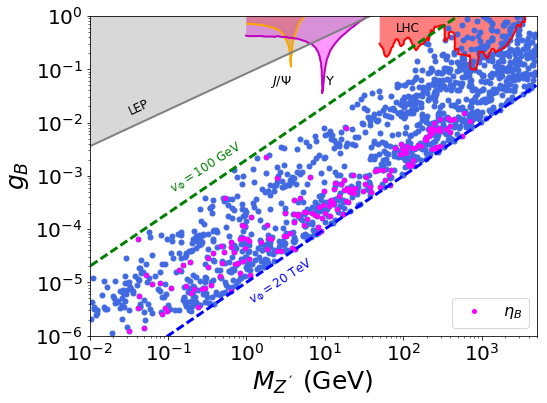

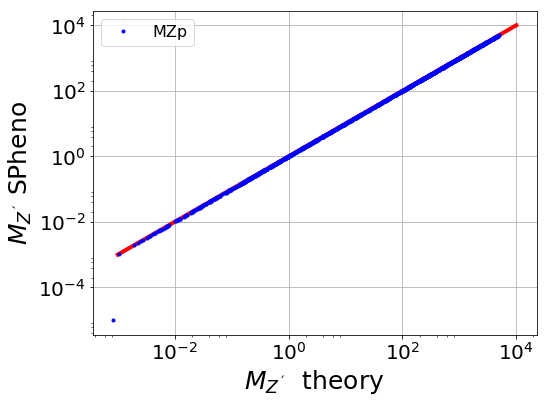

In [27]:
plt.figure(figsize=(8,6))

a = np.linspace(1e-3,1e+4,5)
plt.plot(a,a,'r-', linewidth=4)

plt.loglog(5.*xd.g1p*xd.vx,xd.MZp,'b.')

plt.xlabel(r'$M_{Z^{´}}$  theory',size=25)
plt.ylabel(r'$M_{Z^{´}}$ SPheno',size=25)
plt.grid()

plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
plt.show()

# Direct and indirec detection

In [21]:
from indirectdirect import *

In [22]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#PANDAS 2107.13438
names1 = ['MDM', 'pandaxSI']
b = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandax-2021/pandax21.txt')
dd2 = pd.DataFrame(b, columns=names1)

pandaX21=interpolate.interp1d(dd2.MDM,dd2.pandaxSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

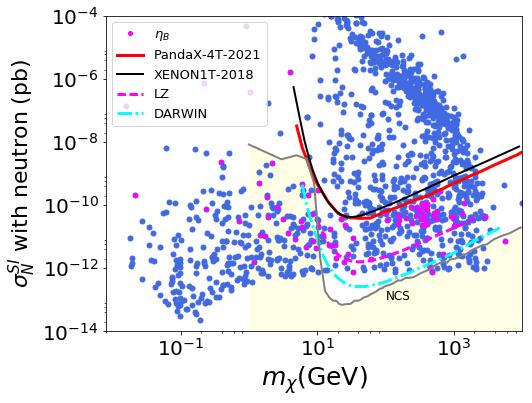

In [23]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=5,linestyle='', label=r'')
#Plot for etaB
plt.plot(etaB10.mchi, etaB10.SIN,color='magenta', marker='o',ms=4,linestyle='',label=r'$\eta_B$')

#plot pandaX 2107.13438
m=np.arange(5,10000)
plt.loglog(m,pandaX21(m)*1e+36,'r-',lw=3,label='PandaX-4T-2021')

#XENON1T
n=np.arange(4.5,9000)
plt.loglog(n,XENON1T(n)*1e+36,'k-',lw=2,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='magenta',linestyle='--',lw=3,label='LZ')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='cyan',linestyle='-.',lw=3,label='DARWIN')

#Neutrino coherent scattering
n=np.arange(1,9.5e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=2.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.1,label='')

plt.text(1e2, 1e-13, 'NCS', color='black', fontsize=12)

plt.xlabel(r'$m_{\chi}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':13},loc='best')

plt.xlim(8e-3,1.0e4)
plt.ylim(1e-14,1e-4)

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

Cut under PandaX

In [24]:
yd0 = xd[np.logical_and(xd.mchi > 5,xd.mchi < 10000)]
yd = yd0[yd0.SIN < pandaX21(yd0.mchi)*1e+36]
zd = xd[xd.mchi < 5]

#good baryogenesis
wd0 = etaB10[np.logical_and(etaB10.mchi > 5,etaB10.mchi < 10000)]
wd = wd0[wd0.SIN < pandaX21(wd0.mchi)*1e+36]
wwd = etaB10[etaB10.mchi < 5]

CONCAT good points

In [25]:
gd = pd.concat([yd,zd],ignore_index=True )
gd = gd.reset_index()
del[gd['index']]

fp = pd.concat([wd,wwd],ignore_index=True )
fp = fp.reset_index()
del[fp['index']]

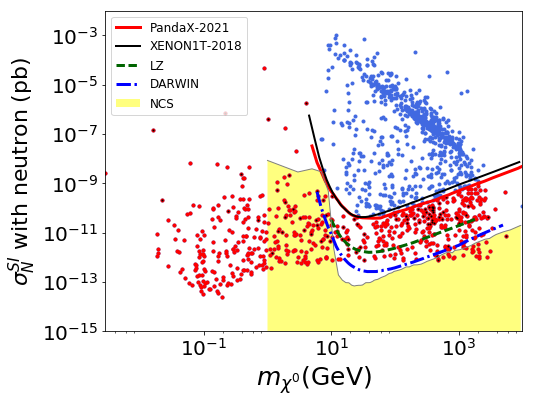

In [26]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(gd.mchi, gd.SIN, color='red', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(fp.mchi, fp.SIN, color='black', marker='o',ms=1,linestyle='', label=r'')

#plot pandaX data 1708.06917
#m=np.arange(8.5,10000)
#plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=3,label='PandaX-2017')

#plot pandaX 2107.13438
m=np.arange(5,10000)
plt.loglog(m,pandaX21(m)*1e+36,'r-',lw=3,label='PandaX-2021')

#XENON1T
n=np.arange(4.5,9000)
plt.loglog(n,XENON1T(n)*1e+36,'k-',lw=2,label='XENON1T-2018')
#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=3,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,9.5e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='blue',linestyle='-.',lw=3,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.xlim(xd.mchi.min(),xd.mchi.max())
plt.ylim(1e-15,1e-2)

plt.tight_layout()
plt.show()

In [64]:
#gd.to_csv('good-points-under-panda.csv')
#fp.to_csv('good-nb.csv')

In [27]:
fp[['vx','g1p','MZp','etaB','mchi','tht','lamt']][:3]

,vx,g1p,MZp,etaB,mchi,tht,lamt
0,6088.134126,0.003120,94.970172,6.790064e-11,232.830707,-1.179065,0.210646
1,4605.010271,0.003367,77.516548,1.319212e-10,632.795311,-0.746738,0.002187
2,6153.207332,0.012218,375.903415,1.785490e-11,1414.985170,-1.569668,29.492208


In [28]:
xxd=fp[np.sqrt(0.1312*np.abs(fp.Lambda4)) < np.abs(fp.Lambda5)/2.]

In [29]:
print(fp.shape,xxd.shape)

(82, 109) (20, 109)


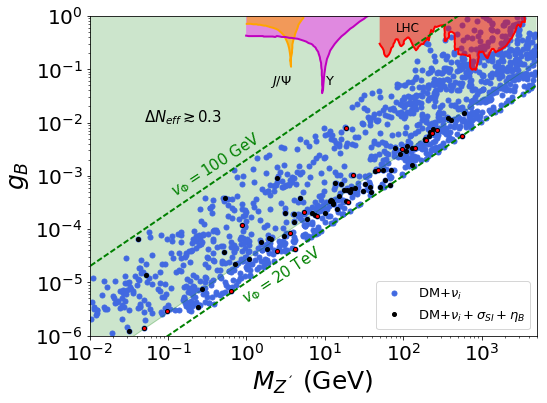

In [30]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MZp, xd.g1p,color='royalblue', zorder=1, marker='o',ms=5,linestyle='',label=r'DM+$\nu_i$')
#plt.loglog(gd.MZp, gd.g1p,color='royalblue', marker='o',ms=4,linestyle='',label='Allowed by PandaX-4T')

a = np.linspace(1e-3,5e3,20)
#Upsilon, LHC, .. limits
plt.plot(JPsi.MZp, JPsi.g1p,color='orange',lw=2,label=r'')
plt.plot(Upsilon.MZp, Upsilon.g1p,'m-',lw=2,label=r'')
plt.plot(1e3*LHC.MZp,LHC.g1p,'r-',lw=2,label='')
#plt.plot(a, LEP_recta(a),color='gray',lw=2,label='')

plt.plot(a, a/(5.*100),'g--',lw=2,label='')
#plt.plot(a, a/(5.*1000),'k--',lw=2,label='')
plt.plot(a, a/(5.*20000),'g--',lw=2,label='')
plt.plot(a, a/(37000),color='green',lw=1,alpha=0.3,label=r'')

plt.fill_between(a,1,a/(37000),facecolor='green',alpha=0.2,label='')
plt.fill_between(Upsilon.MZp,1., Upsilon.g1p,facecolor='magenta',alpha=0.4,label='')
plt.fill_between(JPsi.MZp,1., JPsi.g1p,facecolor='orange',alpha=0.6,label='')
#plt.fill_between(a,1.,LEP_recta(a),facecolor='grey',alpha=0.3,label='')
plt.fill_between(1e3*LHC.MZp,1.e-0,LHC.g1p,zorder=2,facecolor='red',alpha=0.5,label='')

plt.text(1e-1, 4e-3, r'$v_{\Phi}=100$ GeV', color='green', rotation=33, fontsize=15)
plt.text(8e-1, 3e-5, r'$v_{\Phi}=20$ TeV', color='green', rotation=33, fontsize=15)
#plt.text(2e-1, 4e-4, r'$v_{\Phi}=1$ TeV', color='black', rotation=33, fontsize=15)

#plt.text(3e-1, 8e-2, 'LEP', color='dimgray', rotation=25, fontsize=12)
plt.text(5e-2, 1e-2, r'$\Delta N_{eff}\,\gtrsim\, 0.3$', color='black', fontsize=15)
plt.text(1e1, 5e-2, r'$\Upsilon$', color='black', fontsize=13)
plt.text(2e0, 5e-2, r'$J/\Psi$', color='black', fontsize=13)
plt.text(8e1, 5e-1, 'LHC', color='black', fontsize=12)


#plt.loglog(etaB10.MZp, etaB10.g1p,color='magenta', marker='o',ms=4,linestyle='',label=r'$\eta_B$')
#good total poits: DM + nu + SI
plt.loglog(fp.MZp, fp.g1p,color='black', marker='o',ms=4,linestyle='',label=r'DM+$\nu_i+\sigma_{SI}+\eta_B$')
plt.loglog(xxd.MZp, xxd.g1p,color='red', marker='o',ms=2,linestyle='',label=r'')

#plt.plot(a, a/(37000),color='green',lw=2,label=r'$v_{\Phi} = 7.4$ TeV')

#plt.plot(a, a/(5.*5000),'r--',lw=2,label='')

plt.xlabel(r'$M_{Z^{´}}$ (GeV)',size=25)
plt.ylabel(r'$g_B$',size=25)
plt.legend(prop={'size':13}, loc='lower right')

plt.xlim(1e-2,5000)
plt.ylim(1e-6,1)

plt.tight_layout()
plt.savefig('plots/g1_MZp.pdf')
#plt.show()

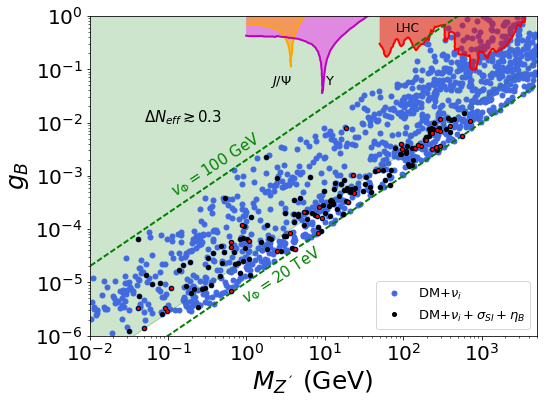

### Anality SI cross-section

In [35]:
#Parameters
fN = 0.25
v = 244.868782
vev = 244.868782
#nucleon mass in GeV (proton and neutron mass)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000
#MW      = 80.385
#MZ      = 91.187

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

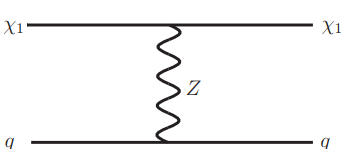

In [36]:
from IPython.display import Image
Image("vector-SI.png", width=400)

\begin{align}
\sigma^{SI}_{\chi N}= \dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{g_B^4}{M_{Z'}^4}B^2
\end{align}

https://arxiv.org/pdf/1409.8165.pdf

where Z is the Z prime gauge boson

In [37]:
xd['mr'] = MNn*xd.mchi/(MNn+xd.mchi)

In [38]:
xd['SIZp_vector'] = (1./(4*np.pi))*xd.mr**2*(xd.g1p**4/xd.MZp**4)*(-2+3)**2*GeVtomin2topb

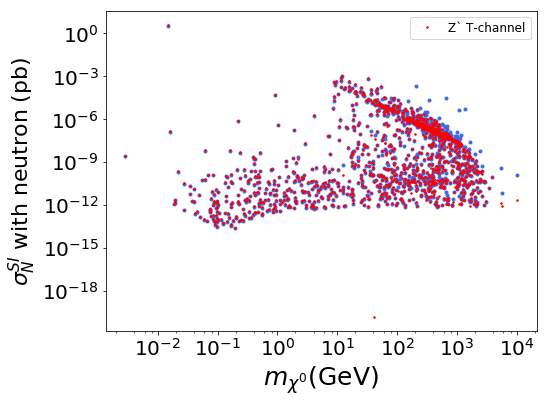

In [24]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(xd.mchi, 3.0*xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z` T-channel')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

Scalar interaction with the Higss

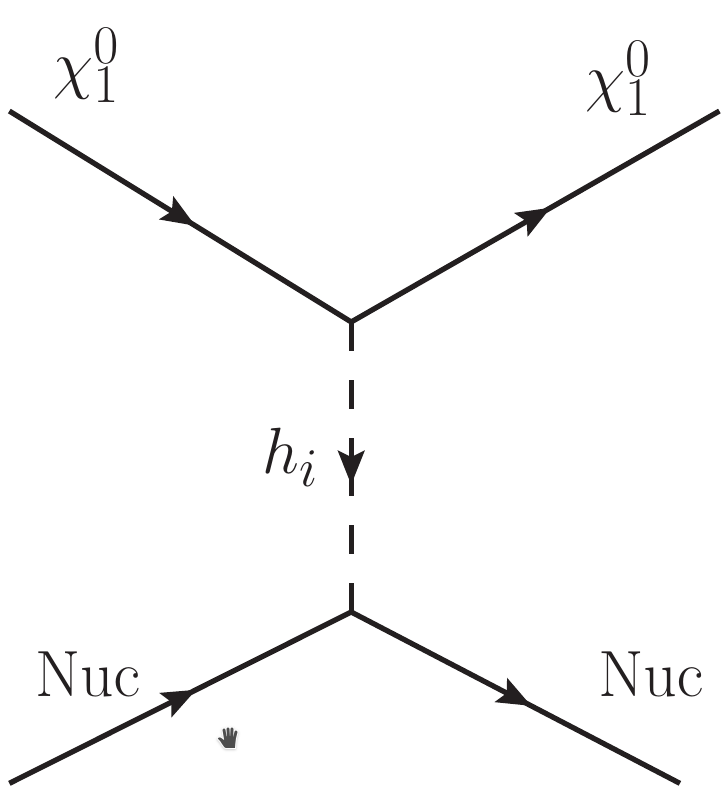

In [25]:
from IPython.display import Image
Image("SI-mass-basis.png", width=200)

\begin{equation}
\sigma_{SI} = 
\dfrac{m_r^2}{\pi}\left(\dfrac{(f_N) m_N}{v_{\text{SM}}}\right)^2
\left(\dfrac{C_{1}}{mh_1^2} + \dfrac{C_{2}}{mh_2^2} \right)^2
\end{equation}

\begin{equation}
C_{\chi^0\chi^0 h_k} = C_{k} = \dfrac{-i}{\sqrt{2}}\lambda_{a1}Z^H_{k2}
\end{equation}

In [39]:
Lambda1 = -0.130
vev = 244.868782
xd['thetaB'] = np.arctan(2*(-vev*xd.vx*xd.Lambda3)/((-3*(vev**2)*Lambda1 + (1/2)*(2*Lambda1*vev**2+xd.Lambda3*xd.vx**2) - 0.5*(xd.vx)**2*xd.Lambda3)-((1/2)*(xd.Lambda3*vev**2 + 2*xd.Lambda2*xd.vx**2) - 3*xd.vx**2*xd.Lambda2-0.5*vev**2*xd.Lambda3)))/2

In [40]:
xd['cxx1'] = (-1/np.sqrt(2)*xd.YA1*np.sin(xd.thetaB))
xd['cxx2'] = (-1/np.sqrt(2)*xd.YA1*np.cos(xd.thetaB))

In [41]:
xd['SI_scalar'] =(xd.mr**2/np.pi)*(fN*MNn/vev)**2*(xd.cxx1*np.cos(xd.thetaB)/xd.mh1**2 + xd.cxx2*np.sin(xd.thetaB)/xd.mh2**2)**2*GeVtomin2topb

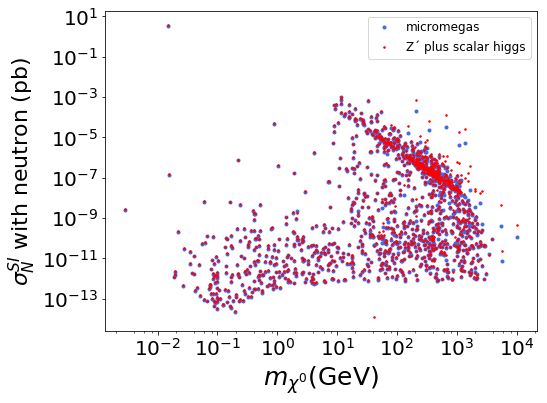

In [29]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'micromegas')
#plt.loglog(xd.mchi, xd.SI_scalar, color='green', marker='.',ms=3,linestyle='', label=r'scalar')
#plt.loglog(xd.mchi, 3*xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z´ T-channel')
plt.loglog(xd.mchi, 3*xd.SI_scalar+3*xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z´ plus scalar higgs')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

$\sigma_{SD}$

In [42]:
from scipy import interpolate

#LZ-1802.06039
names3 = ['MDM', 'LZSD']
lz = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SD-neutron-prosp-2018.csv',names=names3, header=None)
LZSD=interpolate.interp1d(lz.MDM,lz.LZSD)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SD.csv', names=names1, header=None)
DARSD=interpolate.interp1d(dd1.MDM,dd1.DAR)

#XENON SD 2019
names2 = ['MDM', 'XENON1TSD']
xeSD=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/SD-2019/neutron.csv',names=names2, header=None)
XENON1TSD=interpolate.interp1d(xeSD.MDM,xeSD.XENON1TSD)

#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX  neutrons 1705.03380
names4 = ['M', 'sigmaSD']
luxSD = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX-SD-neutron-2017.csv',names=names4, header=None)
LUX_SD_n = interpolate.interp1d(luxSD.M, luxSD.sigmaSD)

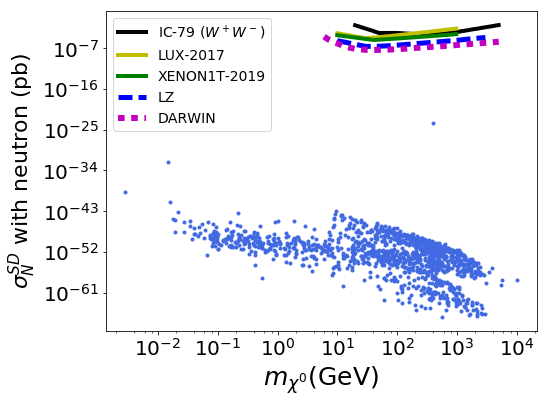

In [43]:
plt.figure(figsize=(8,6))
#For neutrons
plt.loglog(xd.mchi,xd['SDN'], color='royalblue', marker='o',ms=3,linestyle='',label='')
#plt.loglog(gd.mchi,gd['SDN'], color='red', marker='o',ms=3,linestyle='',label='')

#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=4,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
n=np.arange(10,990,20)
plt.plot(n,LUX_SD_n(n),'y',lw=4,label='LUX-2017')

#XENON1T
nx=np.arange(10,990,30)
plt.loglog(nx,XENON1TSD(nx)*1e+36,'g-',lw=4,label='XENON1T-2019')
#LZ-1802.06039
nn=np.arange(10,3000,20)
plt.loglog(nn,LZSD(nn)*1e+36,'b--',lw=5,label='LZ')

# DARWIN SD
n=np.arange(6,5000)
plt.loglog(n,DARSD(n)*1e+36,'m:',lw=6,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SD}$ with neutron (pb)',size=22)
plt.legend(prop={'size':14},loc='best')
#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(xd.SDN.min(),xd.SDN.max())

plt.tight_layout()
plt.savefig('plots/SD.pdf')
#plt.show()

### Mass $|m_{Z^`}-m_{\chi^0}|$ spliting

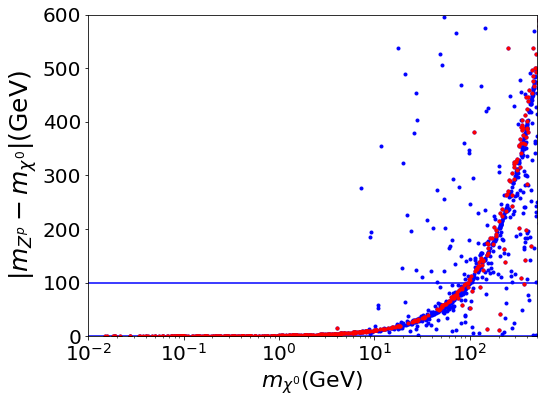

In [44]:
plt.figure(figsize=(8,6))

plt.semilogx(xd.mchi,np.abs(xd.MZp - xd.mchi), color='blue', marker='o',ms=3,linestyle='',label='')
plt.semilogx(gd.mchi,np.abs(gd.MZp - gd.mchi), color='red', marker='o',ms=3,linestyle='',label='')

plt.hlines(0.1, 1e-2,5e2,'b')
plt.hlines(100, 1e-2,5e2,'b')

plt.ylabel(r'$|m_{Z^p}-m_{\chi^0}|$(GeV)',size=25)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=22)
plt.xlim(1e-2,5e2)
plt.ylim(1e-2,6e2)

plt.tight_layout()

plt.show()

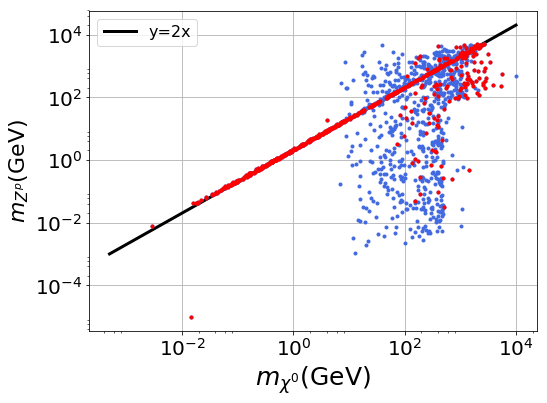

In [45]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-4,1e+4,5)
plt.plot(a,2*a,'k-',lw=3,label='y=2x')

plt.loglog(xd.mchi,xd.MZp, color='royalblue', marker='o',ms=3,linestyle='',label='')
plt.loglog(gd.mchi,gd.MZp, color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$m_{Z^p}$(GeV)',size=22)
plt.legend(prop={'size':16},loc='best')

plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_vs_mZp.pdf')
plt.show()

# $a_{\mu}=\dfrac{(g-2)\tau}{2}=116592040(54)\times 10^{-11}$ Fermilab

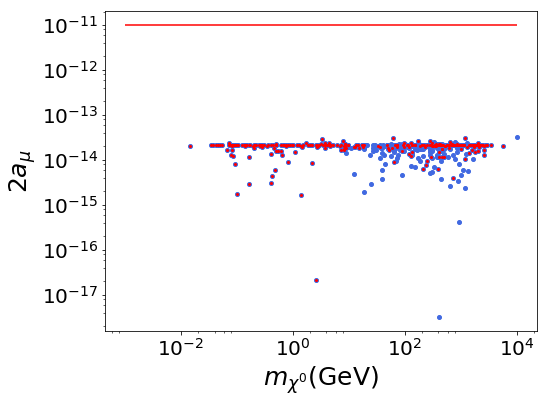

In [30]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.g2mu, color='royalblue', marker='o',ms=4,linestyle='',label='')
plt.loglog(gd.mchi, gd.g2mu, color='red', marker='.',ms=4,linestyle='',label='')

plt.hlines(1e-11,1e-3,1e4,'r')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$2 a_{\mu}$',size=25)
#plt.legend(prop={'size':16},loc='lower left')

plt.tight_layout()
plt.show()

# STU parameters

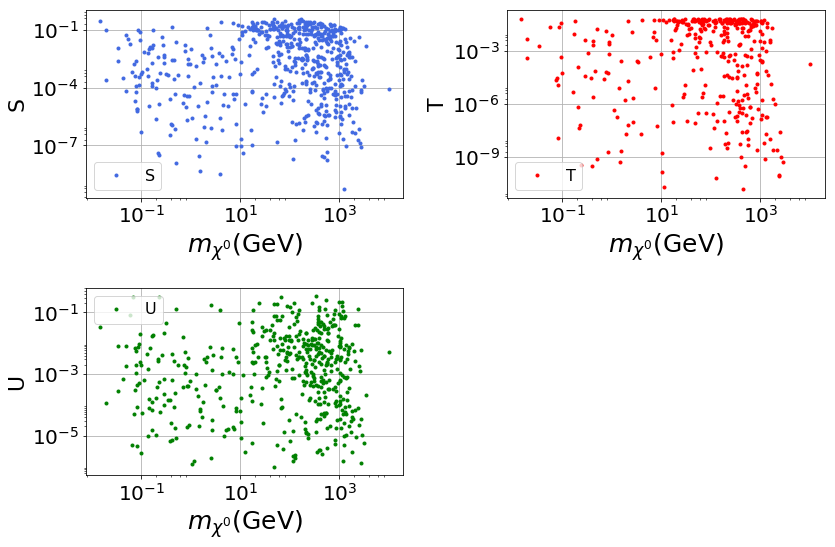

In [68]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mchi, xd['S'], color='royalblue', marker='o',ms=3,linestyle='',label='S')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'S',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mchi, xd['T'], color='r', marker='o',ms=3,linestyle='',label='T')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'T',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.mchi, xd['U'], color='g', marker='o',ms=3,linestyle='',label='U')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'U',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_STU.pdf')
plt.show()

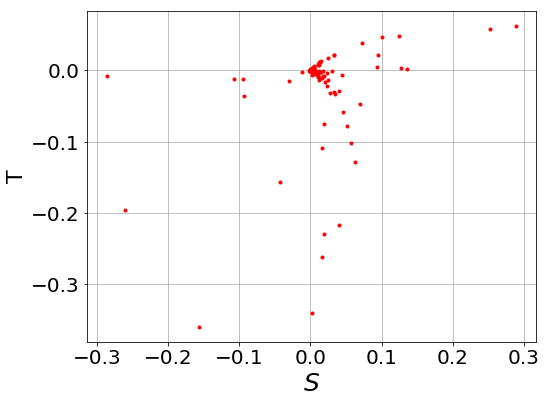

In [69]:
plt.figure(figsize=(8,6))

plt.plot(gd['S'],gd['T'], color='r', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$S$',size=25)
plt.ylabel(r'T',size=22)
#plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_STU.pdf')
plt.show()

## $\sigma v$ today

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1e-10, top=1e-10
  'bottom=%s, top=%s') % (bottom, top))


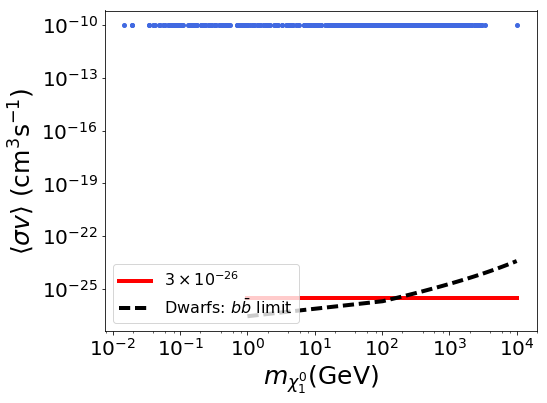

In [70]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.sv, color='royalblue', marker='o',ms=4,linestyle='',label='')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=4,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':16},loc='lower left')
#plt.xlim(9,2e3)
#plt.ylim(1e-36,1e-24)

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
#plt.show()

# Scaning the space parameter

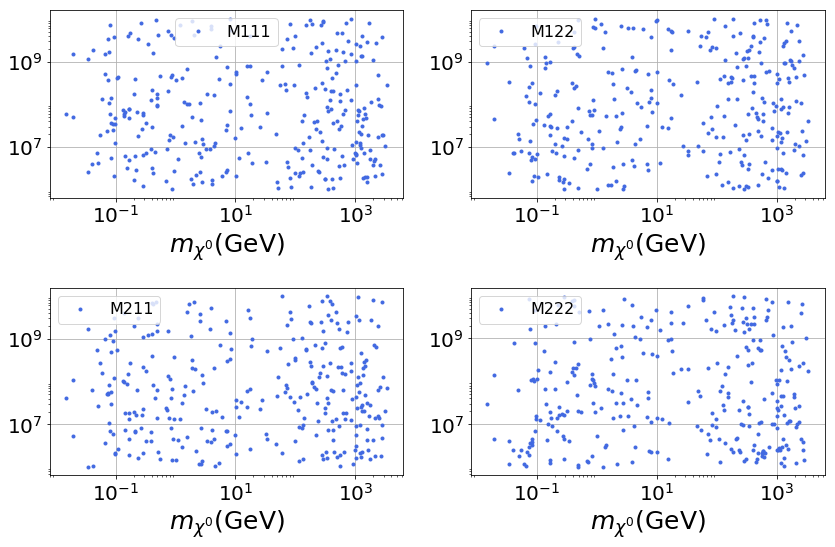

In [71]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['M111'], color='royalblue', marker='o',ms=3,linestyle='',label='M111')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['M122'], color='royalblue', marker='o',ms=3,linestyle='',label='M122')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['M211'], color='royalblue', marker='o',ms=3,linestyle='',label='M211')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['M222'], color='royalblue', marker='o',ms=3,linestyle='',label='M222')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

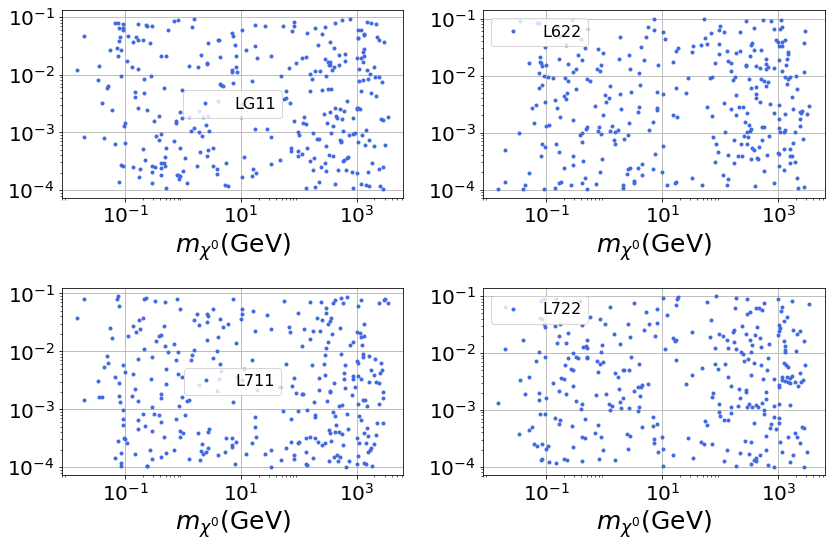

In [72]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['L611'], color='royalblue', marker='o',ms=3,linestyle='',label='LG11')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['L622'], color='royalblue', marker='o',ms=3,linestyle='',label='L622')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi,gd['L711'], color='royalblue', marker='o',ms=3,linestyle='',label='L711')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['L722'], color='royalblue', marker='o',ms=3,linestyle='',label='L722')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

NameError: name 'gd' is not defined

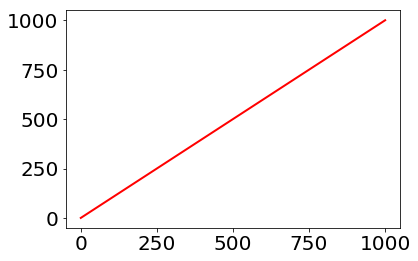

In [16]:
plt.figure(figsize=(6,4))

a = np.linspace(5e-2,1e+3,10)
plt.plot(a,a,'r-',lw=2,label='y=2x')

plt.loglog(gd.mchi, 1./np.sqrt(2)*gd['vx']*gd['YA1'], color='royalblue', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV) SPheno',size=25)
plt.ylabel(r'$m_{\chi^0}$(GeV) analytic',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

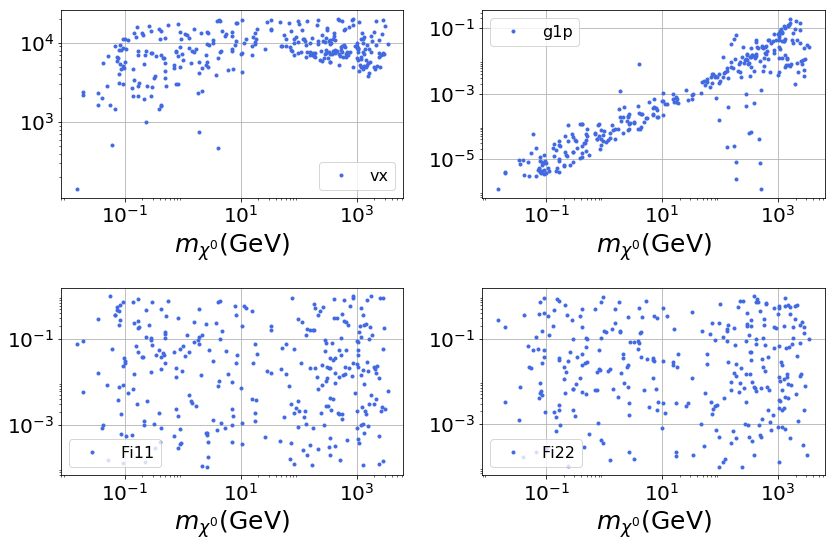

In [74]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['vx'], color='royalblue', marker='o',ms=3,linestyle='',label='vx')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['g1p'], color='royalblue', marker='o',ms=3,linestyle='',label='g1p')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['Fi11'], color='royalblue', marker='o',ms=3,linestyle='',label='Fi11')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['Fi22'], color='royalblue', marker='o',ms=3,linestyle='',label='Fi22')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

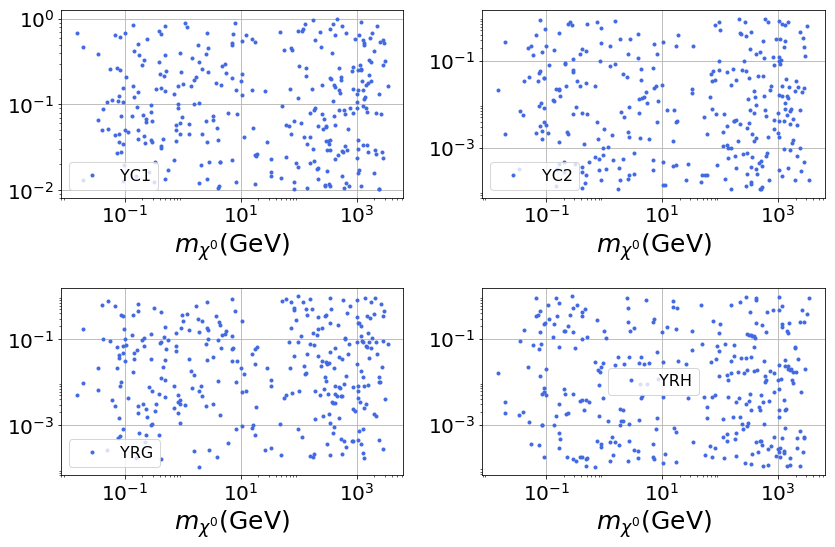

In [75]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['YC1'], color='royalblue', marker='o',ms=3,linestyle='',label='YC1')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['YC2'], color='royalblue', marker='o',ms=3,linestyle='',label='YC2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['YRG'], color='royalblue', marker='o',ms=3,linestyle='',label='YRG')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['YRH'], color='royalblue', marker='o',ms=3,linestyle='',label='YRH')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

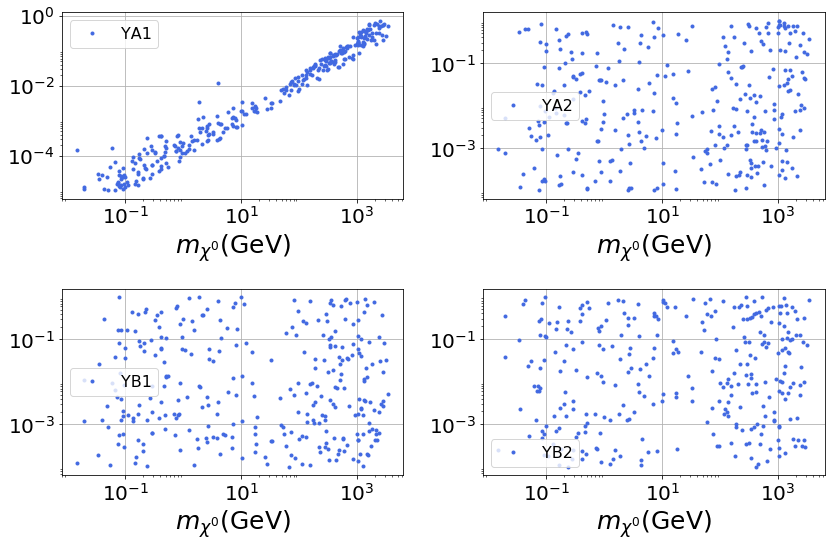

In [76]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['YA1'], color='royalblue', marker='o',ms=3,linestyle='',label='YA1')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['YA2'], color='royalblue', marker='o',ms=3,linestyle='',label='YA2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['YB1'], color='royalblue', marker='o',ms=3,linestyle='',label='YB1')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['YB2'], color='royalblue', marker='o',ms=3,linestyle='',label='YB2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

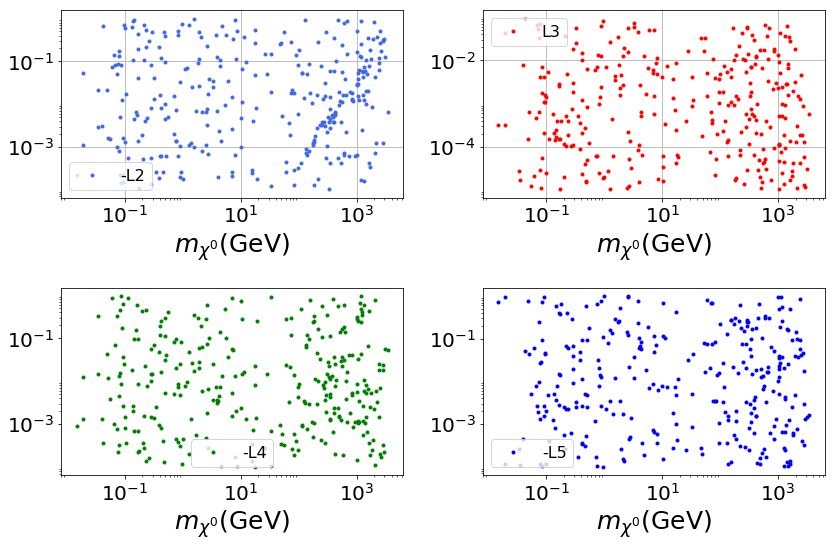

In [77]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, -gd['Lambda2'], color='royalblue', marker='o',ms=3,linestyle='',label='-L2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['Lambda3'], color='r', marker='o',ms=3,linestyle='',label='L3')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, -gd['Lambda4'], color='g', marker='o',ms=3,linestyle='',label='-L4')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')

plt.subplot(2,2,4)
plt.loglog(gd.mchi, -gd['Lambda5'], color='b', marker='o',ms=3,linestyle='',label='-L5')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()
plt.grid()

plt.tight_layout()
plt.show()

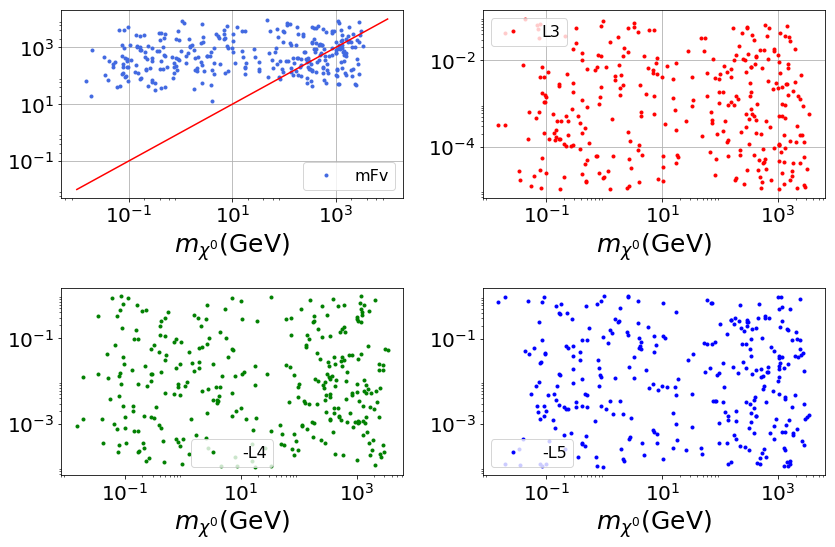

In [78]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['mFv'], color='royalblue', marker='o',ms=3,linestyle='',label='mFv')

a = np.linspace(1e-2,1e4,5)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['Lambda3'], color='r', marker='o',ms=3,linestyle='',label='L3')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, -gd['Lambda4'], color='g', marker='o',ms=3,linestyle='',label='-L4')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')

plt.subplot(2,2,4)
plt.loglog(gd.mchi, -gd['Lambda5'], color='b', marker='o',ms=3,linestyle='',label='-L5')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()
plt.grid()

plt.tight_layout()
plt.show()

In [79]:
kk = gd[gd.mchi < gd.mFv]

In [80]:
print(kk.shape, gd.shape)

(240, 105) (311, 105)


# 